### Exploratory Data Analysis

In [49]:
#Importing libaraies
import numpy as np
import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
%matplotlib inline 

In [4]:
#load datasets
data_path_train = r"C:\Users\User\Desktop\Blessing_AI\Free_AI_Classes_2023\Data\Housing_dataset_train.csv"
df_train = pd.read_csv(data_path_train)

data_path_test = r"C:\Users\User\Desktop\Blessing_AI\Free_AI_Classes_2023\Data\Housing_dataset_test.csv"
df_test = pd.read_csv(data_path_test)

#### Basic data information

In [5]:
df_train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [6]:
#check data shape
df_train.shape

(14000, 7)

In [7]:
df_train.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [8]:
#check data types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [9]:
#get data columns
print(f"columns are:{df_train.columns}")

columns are:Index(['ID', 'loc', 'title', 'bedroom', 'bathroom', 'parking_space', 'price'], dtype='object')


In [29]:
# Assign categorical and numeric columns based on data types
categorical_cols = ["loc","title"]
numeric_cols = ["bedroom","bathroom","parking_space"]

#### Missing values

In [11]:
df_train.isnull().sum()

ID                  0
loc              1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

<Axes: >

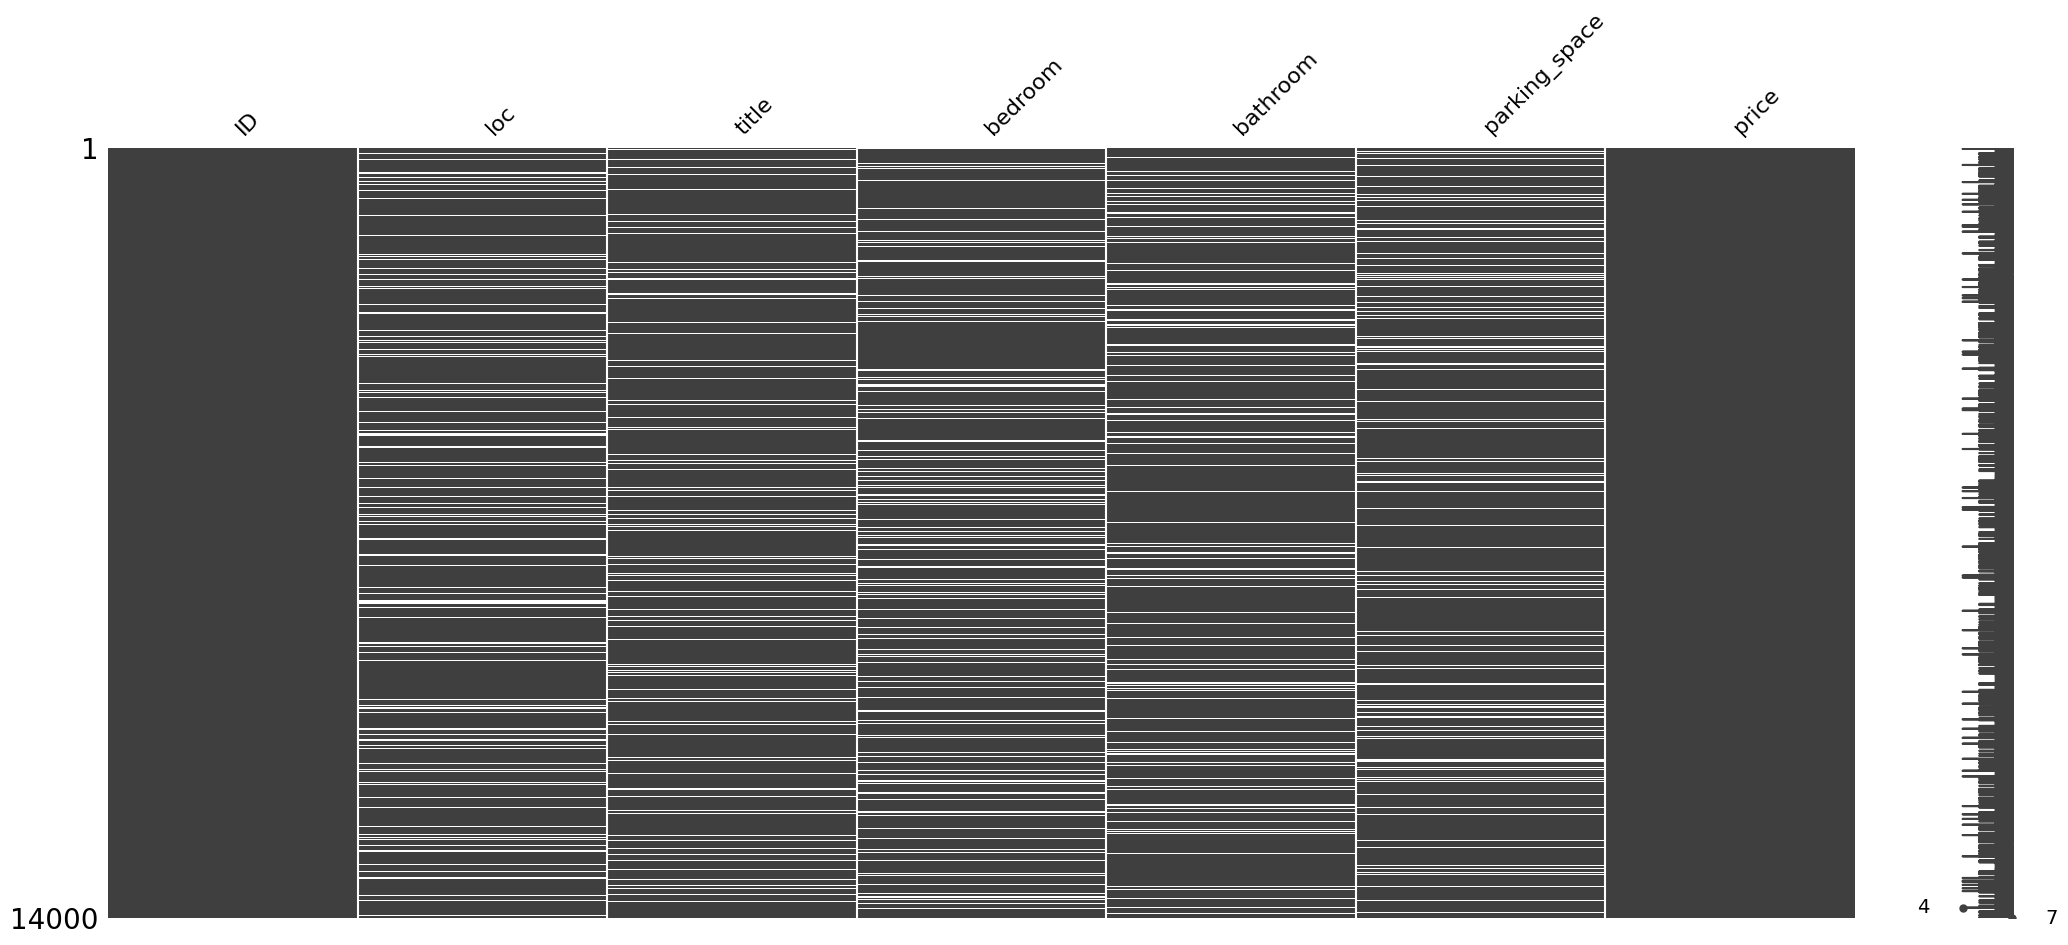

In [12]:
#visuaizing % missing data
msno.matrix(df_train)

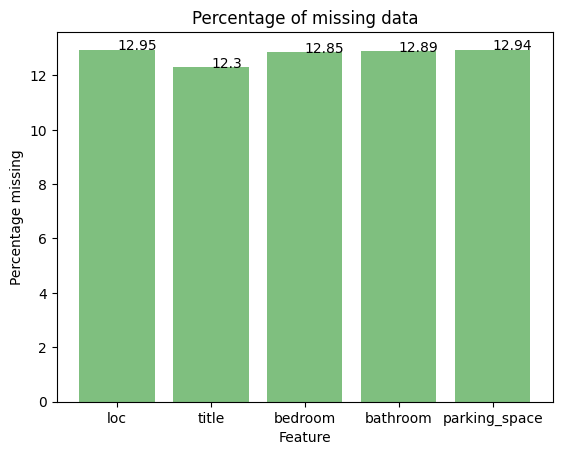

In [13]:
#visualize percent missing values in each column
features = ['loc', 'title', 'bedroom', 'bathroom', 'parking_space']
missing_percentages = [round((df_train[x].isnull().sum())/len(df_train) * 100,2) for x in features]
def addlabels(x,y):
 for i in range(len(x)):
     plt.text(i,y[i],y[i])
    
# giving title to the plot
plt.bar(features,missing_percentages,color = "green",alpha=0.5)

addlabels(features,missing_percentages)
# giving X and Y labels
plt.title("Percentage of missing data")
plt.xlabel("Feature")
plt.ylabel("Percentage missing")
plt.show()

Comment:The percentage of the missing data hangs around 13% for all features

#### Analysing categorical features

In [14]:
categorical_cols

['loc', 'title']

In [15]:
#check unique values in each feature
for feature in categorical_cols:
        print(f'{feature}:{df_train[feature].unique()}:Total : {len(df_train[feature].unique())}')

loc:['Katsina' 'Ondo' 'Ekiti' 'Anambra' 'Kogi' 'Borno' 'Kwara' 'Osun' 'Kaduna'
 'Ogun' 'Bayelsa' nan 'Abia' 'Rivers' 'Taraba' 'Ebonyi' 'Kebbi' 'Enugu'
 'Edo' 'Nasarawa' 'Delta' 'Kano' 'Yobe' 'Benue' 'Bauchi' 'Cross River'
 'Niger' 'Adamawa' 'Plateau' 'Imo' 'Oyo' 'Zamfara' 'Sokoto' 'Jigawa'
 'Gombe' 'Akwa Ibom' 'Lagos']:Total : 37
title:['Semi-detached duplex' 'Apartment' nan 'Detached duplex' 'Terrace duplex'
 'Mansion' 'Bungalow' 'Penthouse' 'Townhouse' 'Flat' 'Cottage']:Total : 11


In [16]:
df_train["loc"].value_counts()

loc
Kaduna         370
Anambra        363
Benue          355
Yobe           353
Borno          351
Kano           351
Nasarawa       349
Cross River    349
Zamfara        348
Imo            348
Ebonyi         346
Kebbi          346
Katsina        345
Ogun           345
Ondo           344
Gombe          343
Bauchi         342
Oyo            341
Adamawa        341
Bayelsa        340
Plateau        338
Osun           338
Jigawa         337
Ekiti          336
Kwara          333
Niger          330
Akwa Ibom      329
Lagos          328
Sokoto         326
Delta          325
Enugu          324
Rivers         323
Kogi           321
Taraba         315
Abia           312
Edo            302
Name: count, dtype: int64

In [17]:
#avergae pricing based on location
df_train.groupby(["loc"])["price"].mean().sort_values(ascending=False)

loc
Lagos          4.210546e+06
Bayelsa        3.112322e+06
Rivers         2.957098e+06
Akwa Ibom      2.725454e+06
Delta          2.712493e+06
Ogun           2.564020e+06
Cross River    2.507765e+06
Anambra        2.337230e+06
Edo            2.310452e+06
Oyo            2.293159e+06
Ondo           2.277494e+06
Enugu          2.272887e+06
Osun           2.180570e+06
Ekiti          2.109220e+06
Kano           2.081931e+06
Imo            2.067489e+06
Nasarawa       2.061764e+06
Katsina        1.947589e+06
Plateau        1.942316e+06
Benue          1.920461e+06
Adamawa        1.905287e+06
Kwara          1.903424e+06
Niger          1.885325e+06
Gombe          1.860851e+06
Taraba         1.855306e+06
Kaduna         1.846993e+06
Bauchi         1.772961e+06
Kogi           1.763416e+06
Yobe           1.747938e+06
Jigawa         1.735867e+06
Borno          1.735704e+06
Abia           1.717083e+06
Zamfara        1.689541e+06
Sokoto         1.681016e+06
Ebonyi         1.635850e+06
Kebbi          1

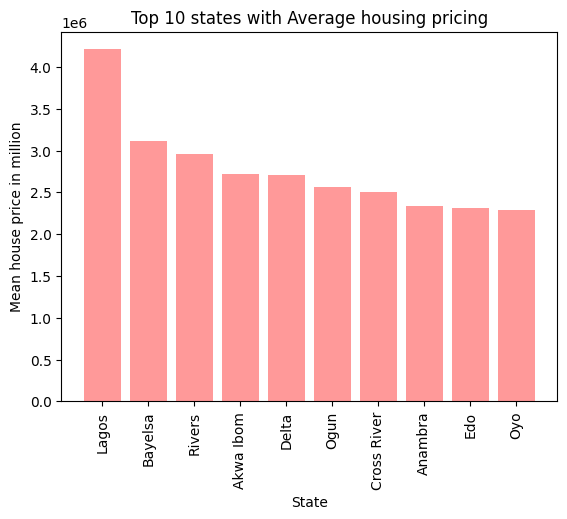

In [18]:
#visualize top 10 states with mean house pricing
top_15 = df_train.groupby(["loc"])["price"].mean().sort_values(ascending=False).head(10)
top_15_states = top_15.index
top_15_values = [round(x,2) for x in top_15.values]

# giving title to the plot
plt.bar(top_15_states,top_15_values,color='red',alpha=0.4)
# giving X and Y labels
plt.title("Top 10 states with Average housing pricing")
plt.xlabel("State")
plt.ylabel("Mean house price in million")
plt.xticks(rotation=90)
plt.show()


Comment: lagos has siginificatly higher mean price when compared to other states

In [19]:
#fill missing values in location with new class
df_train["loc"] = df_train["loc"].fillna("Unknown")
geo_states = {"North_central":["Benue","Kogi", "Kwara", "Nasarawa", "Niger", "Plateau"],
"North_East":["Adamawa", "Bauchi", "Borno", "Gombe", "Taraba", "Yobe"],
"North_West":["Kaduna", "Katsina", "Kano", "Kebbi", "Sokoto", "Jigawa","Zamfara"],
"South_East":["Abia", "Anambra", "Ebonyi", "Enugu", "Imo"],
"South":["Akwa Ibom", "Bayelsa", "Cross River", "Delta", "Edo", "Rivers"],
"South_West":["Ekiti", "Lagos", "Osun", "Ondo", "Ogun", "Oyo"]}

df_train["Geo_zone"] = df_train["loc"]
df_train.loc[df_train["loc"].isin(geo_states["North_central"]),"Geo_zone"] = "North_central"
df_train.loc[df_train["loc"].isin(geo_states["North_East"]),"Geo_zone"] = "North_East"
df_train.loc[df_train["loc"].isin(geo_states["North_West"]),"Geo_zone"] = "North_West"
df_train.loc[df_train["loc"].isin(geo_states["South_East"]),"Geo_zone"] = "South_East"
df_train.loc[df_train["loc"].isin(geo_states["South"]),"Geo_zone"] = "South"
df_train.loc[df_train["loc"].isin(geo_states["South_West"]),"Geo_zone"] = "South_West"
print(df_train["Geo_zone"].unique())
    

['North_West' 'South_West' 'South_East' 'North_central' 'North_East'
 'South' 'Unknown']


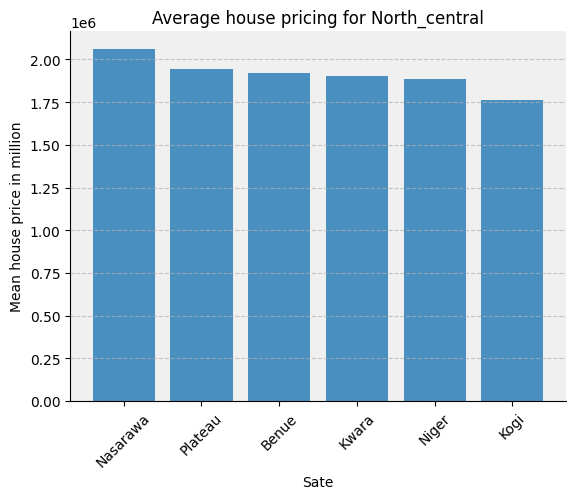

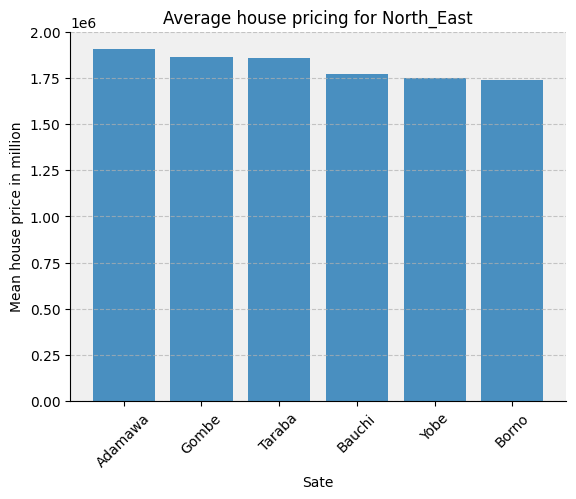

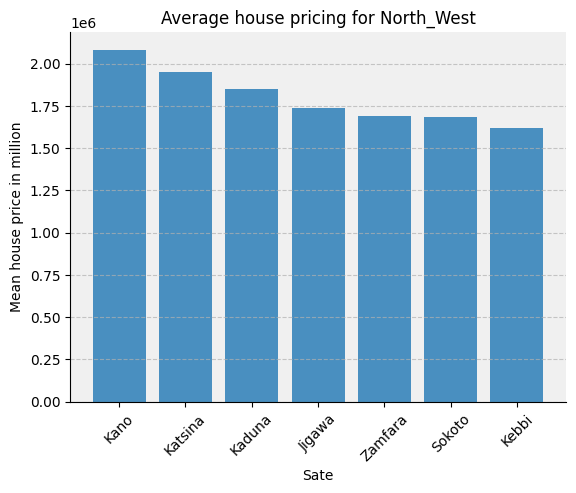

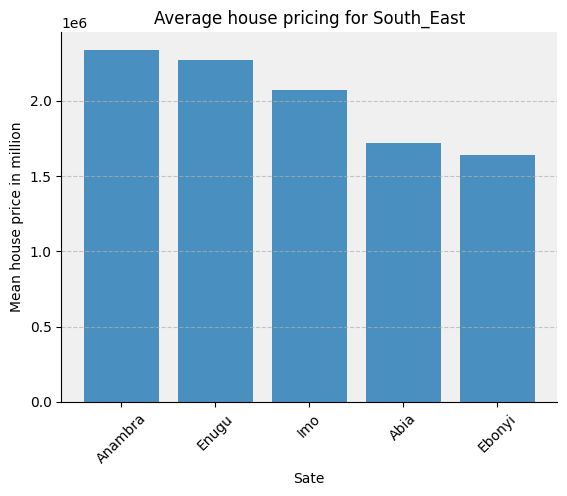

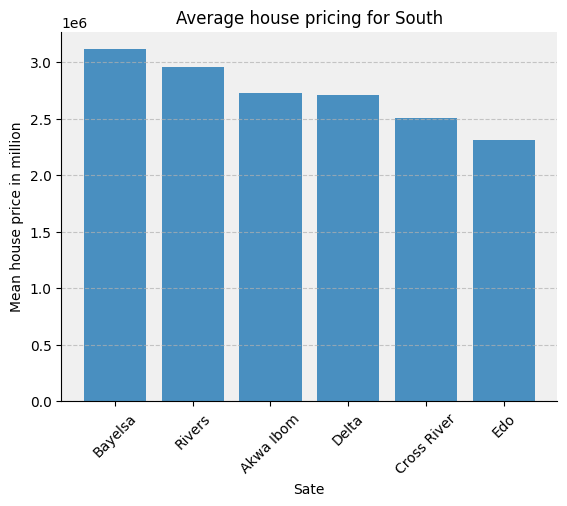

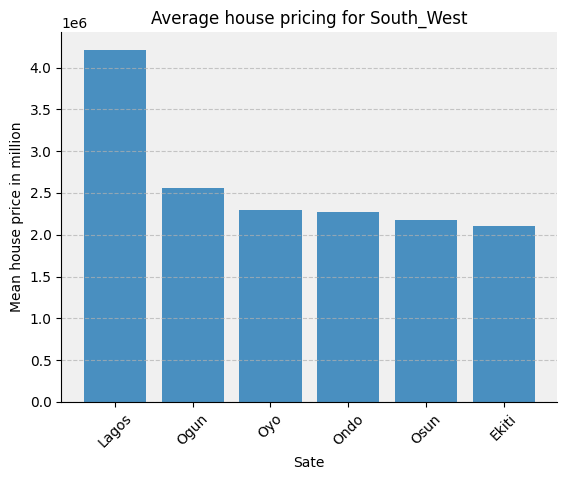

In [20]:
#plot distribution of house prices based on geopolical zones
def plot_geo_mean_pricing(geo_zone):
    df = df_train[df_train["Geo_zone"] == geo_zone]
    df = df.groupby(["loc"])["price"].mean().sort_values(ascending=False)
    x = df.index
    y = df.values
    # giving title to the plot
    plt.bar(x,y,alpha=0.8)
    plt.bar_width=0.5

    #remove chart borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.grid(axis='y',linestyle='--',alpha=0.7)
    plt.gca().set_facecolor('#f0f0f0')
    # giving X and Y labels
    plt.title(f"Average house pricing for {geo_zone}")
    plt.xlabel("Sate")
    plt.ylabel("Mean house price in million")
    plt.xticks(rotation=45)
    plt.show()

for geo_zone in geo_states.keys():
     plot_geo_mean_pricing(geo_zone=geo_zone) 


In [21]:
#Analysing title of house
df_train["title"].unique()
#fill missing values with unknow
df_train["title"] = df_train["title"].fillna("Unknown")

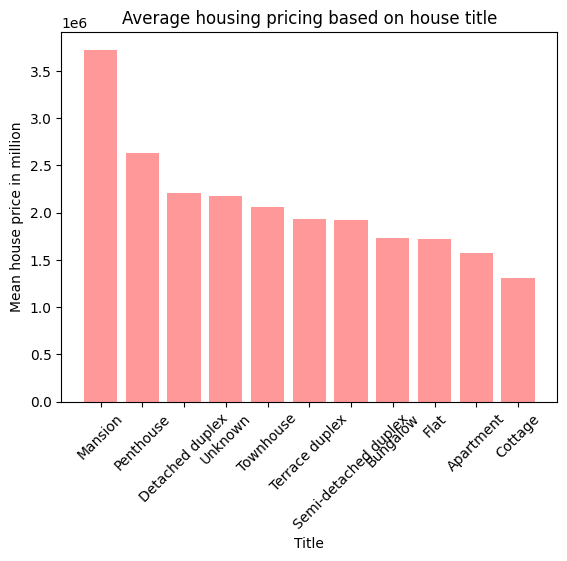

In [70]:
#visualize top 10 states with mean house pricing
top_ = df_train.groupby(["title"])["price"].mean().sort_values(ascending=False)
title = top_.index
val = [round(x,2) for x in top_.values]

# giving title to the plot
plt.bar(title,val,color='red',alpha=0.4)
# giving X and Y labels
plt.title("Average housing pricing based on house title")
plt.xlabel("Title")
plt.ylabel("Mean house price in million")
plt.xticks(rotation=45)
plt.show()


In [23]:
df_train.isnull().sum()

ID                  0
loc                 0
title               0
bedroom          1799
bathroom         1805
parking_space    1811
price               0
Geo_zone            0
dtype: int64

In [24]:
df_train["title"].value_counts()

title
Unknown                 1722
Flat                    1372
Apartment               1331
Townhouse               1327
Mansion                 1322
Detached duplex         1312
Penthouse               1306
Semi-detached duplex    1299
Bungalow                1293
Terrace duplex          1266
Cottage                  450
Name: count, dtype: int64

#### Numerical features

In [27]:
numeric_cols

['bedromm', 'bathroom', 'parking_space']

In [31]:
#check missing values
df_train[numeric_cols].isnull().sum()

bedroom          1799
bathroom         1805
parking_space    1811
dtype: int64

In [34]:
#Check number of unique values in each feature
for feature in numeric_cols:
    print(f"{feature} : {df_train[feature].unique()},Total unique values:{len(df_train[feature].unique())}")
    

bedroom : [ 2. nan  7.  5.  3.  1.  4.  6.  9.  8.],Total unique values:10
bathroom : [ 2.  5.  1.  4.  3. nan  7.  6.],Total unique values:8
parking_space : [ 1.  4. nan  6.  3.  5.  2.],Total unique values:7


In [37]:
#chek count of each unique value
for feature in numeric_cols:
    print(f"{feature}:{df_train[feature].value_counts()}")
    print("*****************************")

bedroom:bedroom
5.0    1789
2.0    1741
1.0    1738
3.0    1736
4.0    1641
6.0     908
7.0     888
9.0     883
8.0     877
Name: count, dtype: int64
*****************************
bathroom:bathroom
1.0    3272
2.0    3255
7.0    1156
5.0    1143
6.0    1138
3.0    1119
4.0    1112
Name: count, dtype: int64
*****************************
parking_space:parking_space
4.0    2419
2.0    2394
3.0    2378
1.0    2324
6.0    1345
5.0    1329
Name: count, dtype: int64
*****************************


In [65]:
#group hpuse title based on mode number of bedroom
# Group by 'Category' and calculate the mode of 'Value' for each group
def group_feature_by_feature_based_on_mode(by_feature,feature,df):
    modes_values = []
    titles = df[by_feature].unique()
    for title in titles:
        new_df = df[df[by_feature] == title]
        mode_value =  new_df[feature].mode()[0]
        modes_values.append(mode_value)
    mode_dict = dict(zip(titles, modes_values))

    return mode_dict

    #fill missing values by mode house title
def fill_missing_by_mode(cols,mode_dict=mode_values):
    col1 = cols[0]
    col2 = cols[1]
    if pd.isnull(col2):
        return mode_dict[col1]
    else:
        return col2
#Fill missing values in bedroom by mode value of house title
mode_values = group_feature_by_feature_based_on_mode(by_feature = "title",feature="bedroom",df=df_train)
df_train["bedroom"] = df_train[["title","bedroom"]].apply(fill_missing_by_mode,axis = 1)

#Fill missing values in bathroon by mode value of house title
mode_values = group_feature_by_feature_based_on_mode(by_feature = "title",feature="bathroom",df=df_train)
df_train["bathroom"] = df_train[["title","bathroom"]].apply(fill_missing_by_mode,axis = 1)

#Fill missing values in parking by mode value of house titl
mode_values = group_feature_by_feature_based_on_mode(by_feature = "title",feature="parking_space",df=df_train)
df_train["parking_space"] = df_train[["title","parking_space"]].apply(fill_missing_by_mode,axis = 1)

df_train.isnull().sum()

ID               0
loc              0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
Geo_zone         0
dtype: int64

In [66]:
df_train.head()

,ID,loc,title,bedroom,bathroom,parking_space,price,Geo_zone
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,North_West
1,2748,Ondo,Apartment,1.0,2.0,4.0,1672416.689,South_West
2,9261,Ekiti,Unknown,7.0,5.0,2.0,3364799.814,South_West
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,South_East
4,10300,Kogi,Terrace duplex,1.0,5.0,6.0,2600700.898,North_central


#### Availability of parking space
Question : How does the availability of parking spaces influence the house price? Are properties with more parking spaces valued higher,

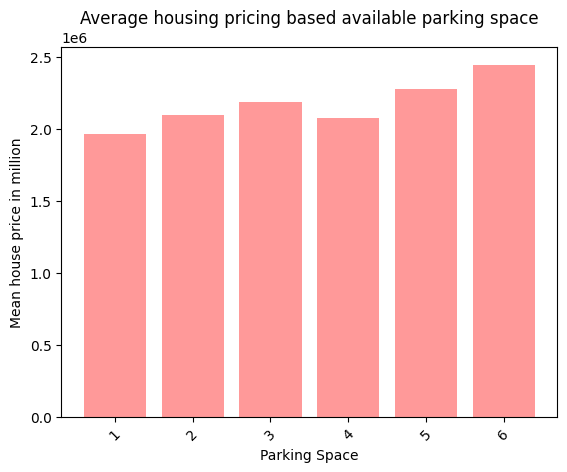

In [68]:
#visualize top 10 states with mean house pricing
pk_space = df_train.groupby(["parking_space"])["price"].mean().sort_values(ascending=False)
space = pk_space.index
mean_price = [round(x,2) for x in pk_space.values]

# giving title to the plot
plt.bar(space,mean_price,color='red',alpha=0.4)
# giving X and Y labels
plt.title("Average housing pricing based available parking space")
plt.xlabel("Parking Space")
plt.ylabel("Mean house price in million")
plt.xticks(rotation=45)
plt.show()


Comment: Clealy parking space influenced the house price

#### Influence on number of bedroom on house prices
Does the number of bathrooms have a significant impact on the house price? Are houses with more bathrooms generally priced higher, and is this true for all property types?

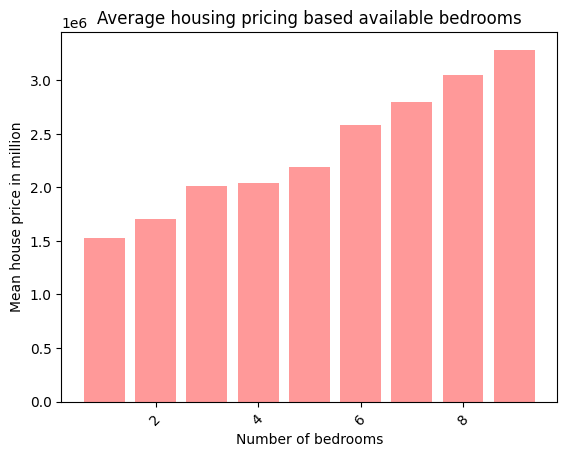

In [71]:
#visualize top 10 states with mean house pricing
bed_rooms = df_train.groupby(["bedroom"])["price"].mean().sort_values(ascending=False)
space = bed_rooms.index
mean_price = [round(x,2) for x in bed_rooms.values]

# giving title to the plot
plt.bar(space,mean_price,color='red',alpha=0.4)
# giving X and Y labels
plt.title("Average housing pricing based available bedrooms")
plt.xlabel("Number of bedrooms")
plt.ylabel("Mean house price in million")
plt.xticks(rotation=45)
plt.show()


Is this trend the same for all house types?

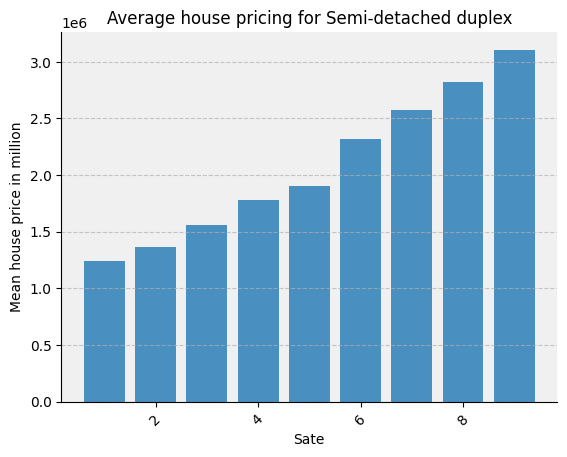

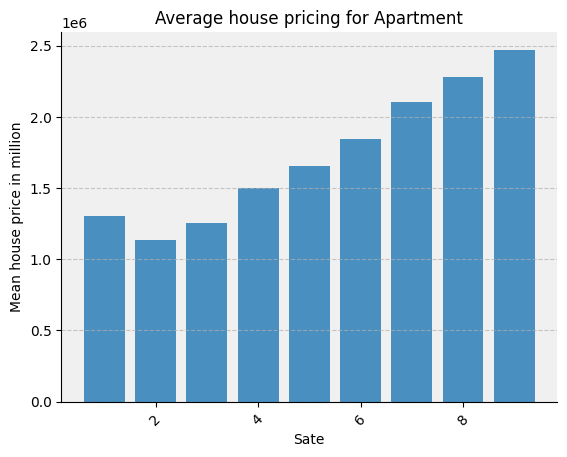

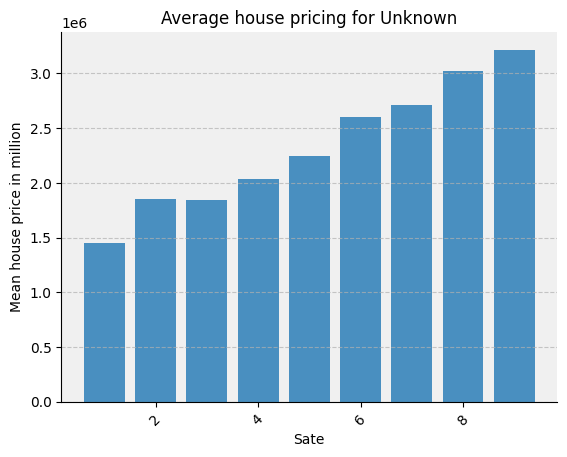

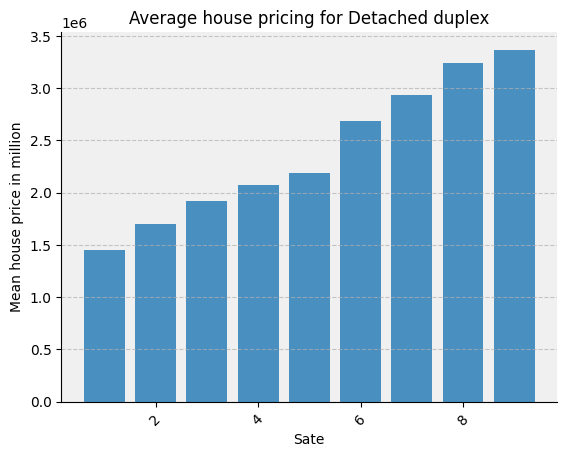

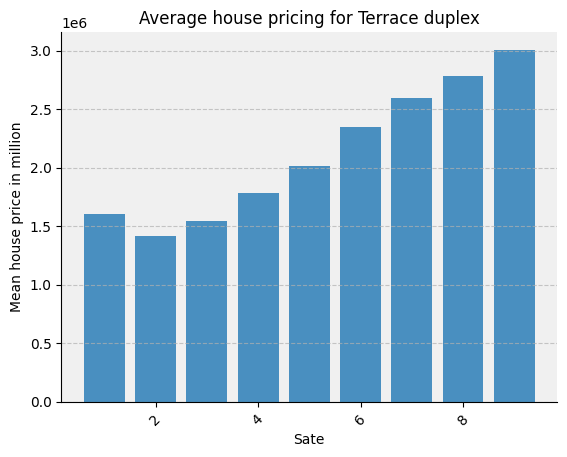

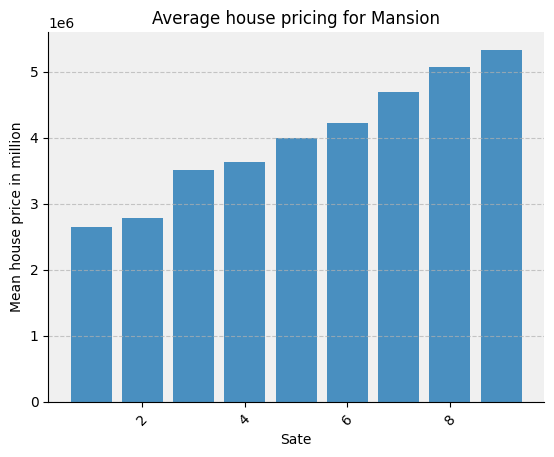

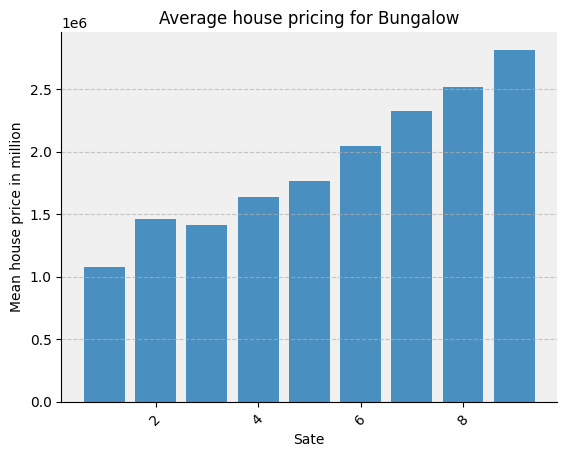

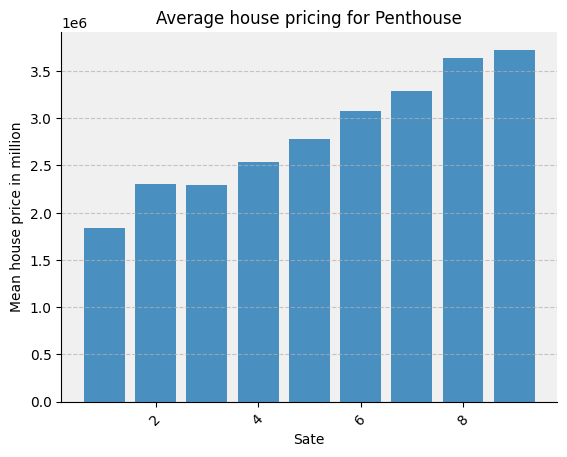

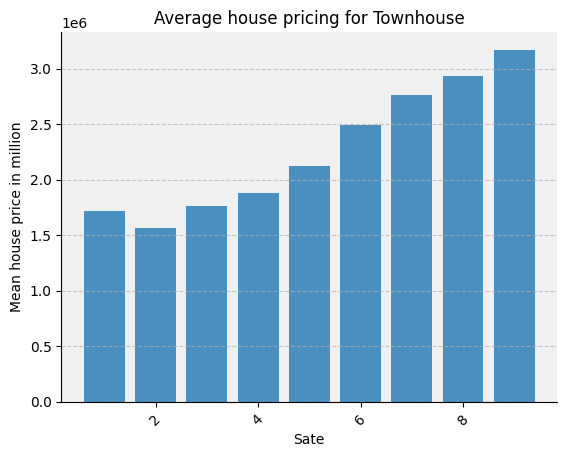

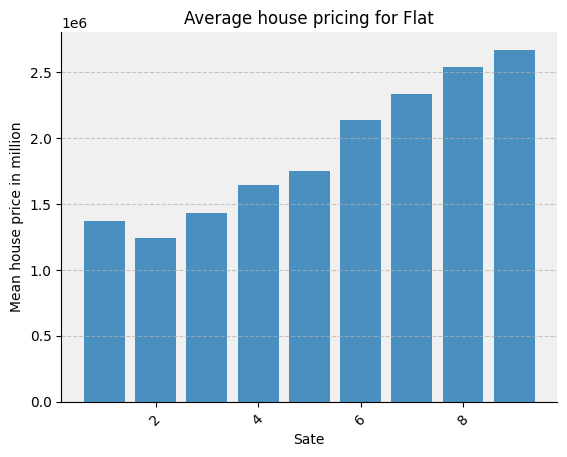

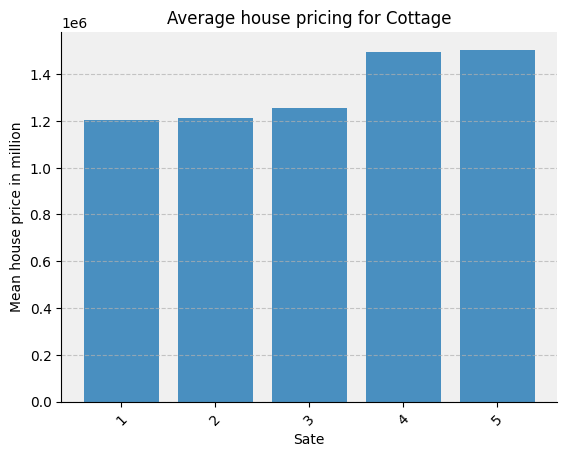

In [72]:
#plot distribution of house prices based on geopolical zones
def plot_bedroon_mean_pricing(title_type):
    df = df_train[df_train["title"] == title_type]
    df = df.groupby(["bedroom"])["price"].mean().sort_values(ascending=False)
    x = df.index
    y = df.values
    # giving title to the plot
    plt.bar(x,y,alpha=0.8)
    plt.bar_width=0.5

    #remove chart borders
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.grid(axis='y',linestyle='--',alpha=0.7)
    plt.gca().set_facecolor('#f0f0f0')
    # giving X and Y labels
    plt.title(f"Average house pricing for {title_type}")
    plt.xlabel("Sate")
    plt.ylabel("Mean house price in million")
    plt.xticks(rotation=45)
    plt.show()

for title in df_train["title"].unique():
     plot_bedroon_mean_pricing(title_type=title) 

Comment : The trend remains the same for all house types(title) though the trend is least significant when it comes to cottages